<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from submission_to_mask import *
from helpers import *
from mask_to_submission import *

Using TensorFlow backend.


In [2]:
def show(img, img2=None):
    if not img2 is None:
        img = np.concatenate((img_to_rgb(img), img_to_rgb(img2)), axis=1)
    else:
        img = img_to_rgb(img)
    plt.figure(figsize=(15,7))
    plt.imshow(img.astype(np.uint8))
    plt.show()

In [3]:
from unet import UNet

In [4]:
unet = UNet(400, 400, n_channels=3)

In [5]:
model, pred = unet.train(data_dir="/data/", deepness=5, sample_size=100, batch_size=5, epochs=30, kernel_size=3)

loading data...
>>> all images will be resized to shape: (400, 400, 3)
data loaded
loading model...


/output/src/gregunz_exploration/unet.py:75: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/usr/local/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/output/src/gregunz_exploration/unet.py:80: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/output/src/gregunz_exploration/unet.py:85: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([c

model loaded
creating model checkpoint
fitting model...
Train on 80 samples, validate on 20 samples
Epoch 1/30
80/80 [==============================] - 73s - loss: 0.5132 - acc: 0.8024 - val_loss: 0.5169 - val_acc: 0.7881
Epoch 2/30
80/80 [==============================] - 61s - loss: 0.4859 - acc: 0.8024 - val_loss: 0.4995 - val_acc: 0.7881
Epoch 3/30
10/80 [==>...........................] - ETA: 46s - loss: 0.4984 - acc: 0.7797

KeyboardInterrupt: 

In [6]:
X_tr, Y, X_te = unet.load_data(sample_size=100, data_dir="/data/")

loading data...
>>> all images will be resized to shape: (400, 400, 3)
data loaded


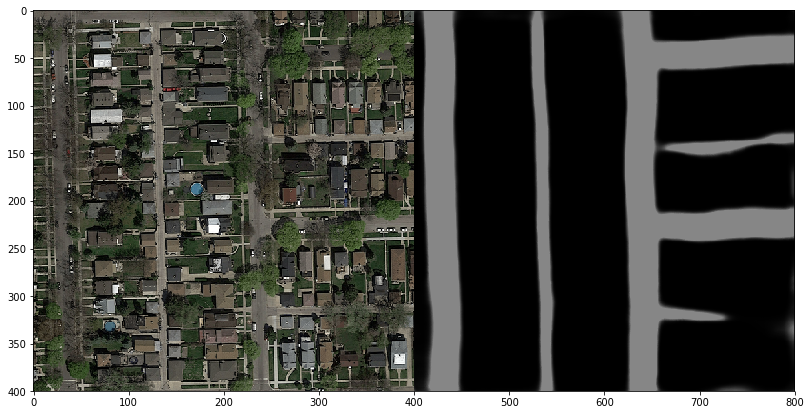

In [41]:
i = 20
show(X_te[i] * 255, (pred[i]) * 255)

In [7]:
model_loaded = unet.get_model(deepness=5, kernel_size=4)
model_loaded.load_weights("u_net.hdf5")

loading model...


/output/src/gregunz_exploration/unet.py:75: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/usr/local/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/output/src/gregunz_exploration/unet.py:80: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/output/src/gregunz_exploration/unet.py:85: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([c

model loaded


In [8]:
def data_aug(a):
    return np.array([np.rot90(a[i], j) for i in range(a.shape[0]) for j in range(4)])

X_tr_ext = data_aug(X_tr)
Y_ext = data_aug(Y)

X_tr_ext.shape, Y_ext.shape

((400, 400, 400, 3), (400, 400, 400, 1))

In [ ]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('u_net.hdf5', monitor='loss', verbose=1, save_best_only=True)
callbacks = [model_checkpoint]
model_loaded.fit(X_tr_ext,
                  Y_ext,
                  batch_size=5,
                  epochs=10,
                  verbose=1,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=callbacks)


Train on 320 samples, validate on 80 samples
Epoch 1/10
  5/320 [..............................] - ETA: 1862s - loss: 0.2082 - acc: 0.9375

In [10]:
1+1

2

In [11]:
pred = model_loaded.predict(X_te, batch_size=1, verbose=1)

50/50 [==============================] - 13s    


In [19]:
Y_tr = model_loaded.predict(X_tr, batch_size=1, verbose=1)

100/100 [==============================] - 22s    


In [106]:
np.mean(Y)

0.20046838

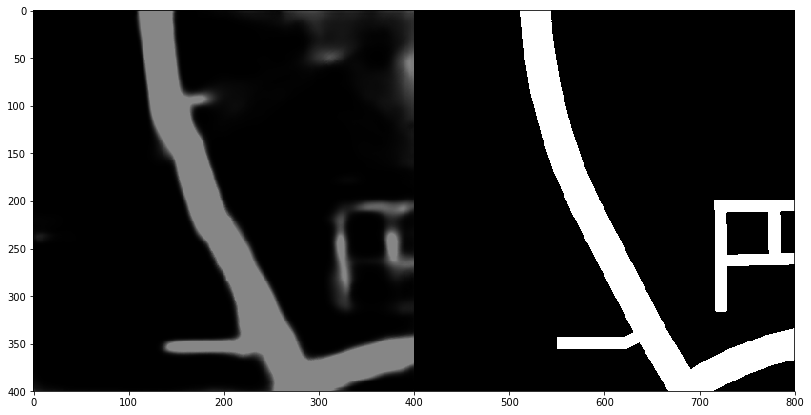

In [28]:
i = 31
show((Y_tr[i]) * 255, Y[i] * 255)

In [21]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 400, 400, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 400, 400, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 400, 400, 64)  36928       conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 200, 200, 64)  0           conv2d_2[0][0]                   
___________________________________________________________________________________________